## Parellel Coordinates

In [ ]:
!pip install --upgrade --user seaborn
!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from scipy.spatial import ConvexHull

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/ 


In [2]:
# load the dataset
cols = ['Alcohol','Malic acid','Ash','Alcalinity'  ,'Magnesium','Total phenols','Flavanoids'
,'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315','Proline']

missing_values = ["n/a", "na", "--"]
df_wine = pd.read_csv("wine.data" ,  names= ['cultivar'] + cols , na_values = missing_values)
df_wine.head()

,cultivar,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# checking for null or missing value
missing = df_wine.isnull().sum()
missing[ missing > 0]

Series([], dtype: int64)

In [4]:
#Normalize Data except class label ('cultivar')
y = df_wine['cultivar']
X = df_wine.loc[:,'Alcohol':'Proline'].to_numpy()
scaled_values = StandardScaler().fit_transform(X)

X = np.concatenate((np.expand_dims(y, axis=1),scaled_values),axis=1)
df_wine = pd.DataFrame(X, columns = ['cultivar'] + cols)


###  Parellel coordinates is a good approach for exploring any trends to the features. \
As it is presented  **the cultivar 2** has _low color intensity_  and _high hue_. \
The cultivar 2 is shown by _red color_ in graph

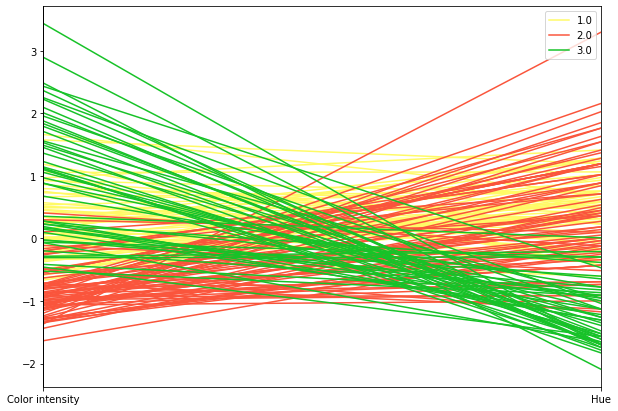

In [5]:
col_name = ['cultivar','Color intensity' ,'Hue']
df_sub_win = df_wine[col_name]

plt.figure(figsize=(10,7))
parallel_coordinates(frame=df_sub_win, class_column='cultivar',color=['#fffa66', '#fa553c' ,'#17c228'])
plt.grid(False)
plt.show()